In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.linear_model import LogisticRegression

In [2]:
np.random.seed(1224)

In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
print(X.shape)

(1797, 64)


In [5]:
print(X.max())

16.0


In [6]:
X = X / 16.

In [7]:
X = X - 0.5

In [8]:
X_train, X_held, y_train, y_held = train_test_split(X, y, test_size=0.3, shuffle=True)

In [9]:
print(X_train[3])

[-0.5    -0.5     0.25    0.5     0.375  -0.25   -0.5    -0.5    -0.5
 -0.5     0.      0.375   0.5     0.125  -0.5    -0.5    -0.5    -0.5
 -0.5    -0.5     0.375   0.3125 -0.5    -0.5    -0.5    -0.5    -0.5
 -0.5     0.3125  0.125  -0.5    -0.5    -0.5    -0.375   0.4375  0.5
  0.5     0.3125 -0.3125 -0.5    -0.5    -0.4375  0.      0.25    0.4375
  0.25   -0.25   -0.5    -0.5    -0.5    -0.375   0.4375  0.     -0.5
 -0.5    -0.5    -0.5    -0.5     0.25    0.3125 -0.5    -0.5    -0.5
 -0.5   ]


In [10]:
def show_digit_ax(X, ax, vmin=None, vmax=None):
    ax.imshow(X.reshape(8,8), cmap=cm.Greys, vmin=vmin, vmax=vmax)
    ax.set_aspect('equal')

def show_digit(X, vmin=None, vmax=None):
    fig = plt.figure()
    ax = fig.add_subplot('111')
    show_digit_ax(X, ax, vmin, vmax)
    plt.show()
    
def show_digits(X, row_length=4):
    X = X.reshape(-1,8)
    assert X.shape[0] % 8 == 0
    total_digits = X.shape[0] // 8
     

Изображения размером 8 на 8, пиксели от 0 до 15. Я преобразовал эти пиксели в диапазон -0.5,+0.5 но не суть.

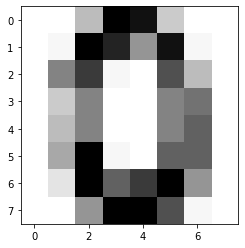

In [11]:
show_digit(X_train[1], vmin=-0.5, vmax=0.5)

Нарисуем примеры цифр. Чем чернее - тем больше значение пикселя.

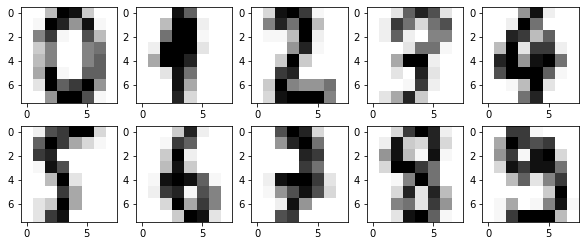

In [13]:
fig = plt.figure(figsize=(10,4))
for i in range(1, 11):
    ax = fig.add_subplot(2,5,i)
    show_digit_ax(X_train[y_train==i-1][0], ax, vmin=-0.5, vmax=0.5)

Натренируем линейную модель

In [14]:
logr = LogisticRegression().fit(X_train, y_train)

/root/.pyenv/versions/3.7.3/envs/general37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/.pyenv/versions/3.7.3/envs/general37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
logr.coef_.shape

(10, 64)

In [16]:
vmin = logr.coef_.min()
vmax = logr.coef_.max()

Визуализируем её веса на каждую цифру (паттерны)

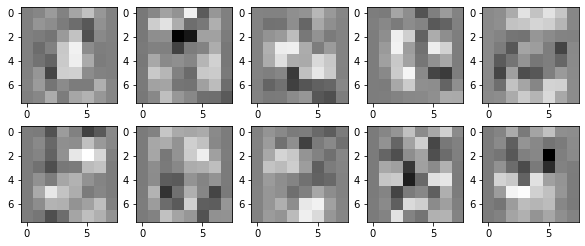

In [17]:
fig = plt.figure(figsize=(10,4))
for i in range(1, 11):
    ax = fig.add_subplot(2,5,i)
    show_digit_ax(logr.coef_[i-1], ax, vmin=vmin, vmax=vmax)

Точность 97%

In [18]:
logr.score(X_held, y_held)

0.9722222222222222

Посчитаем среднее по каждому пикселю на каждую цифру и визуализируем

In [19]:
avg_images = [np.mean(X_train[y_train == c], axis=0) for c in range(10)]

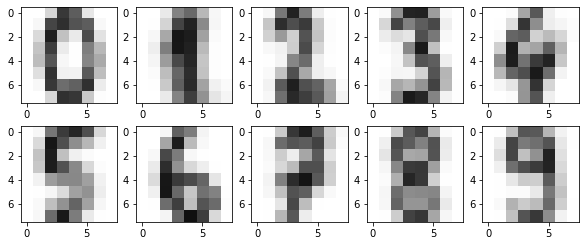

In [20]:
fig = plt.figure(figsize=(10,4))
for i in range(1, 11):
    ax = fig.add_subplot(2,5,i)
    show_digit_ax(avg_images[i-1], ax, vmin=-0.5, vmax=0.5)

Заменим те веса, что были выучены, на усредненные изображения

In [21]:
logr.coef_ = np.array(avg_images)
logr.intercept_ = np.zeros(10)

Точность упала до 86, но таки работает

In [22]:
logr.score(X_held, y_held)

0.8629629629629629